# Contains code to manipulate rsf_data.csv

In [2]:
import pandas as pd
from datetime import datetime
from datetime import time
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib import dates
from dateutil import tz, parser
import matplotlib.dates as mdates
from scipy.interpolate import interp1d
import numpy as np
myFmt = mdates.DateFormatter('%H:%M')



days_of_the_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [3]:
def within_opening_hours(dt: datetime) -> bool:
    if 0 <= dt.weekday() <= 4:
        return 7 <= dt.hour <= 22
    elif dt.weekday() == 5:
        return 8 <= dt.hour <= 17
    else:
        return 8 <= dt.hour <= 22
def hour_minute_only(dt: datetime) -> datetime:
    return datetime.now().replace(hour=dt.hour, minute=dt.minute, second=0)



In [4]:
rsf_data = pd.read_csv("rsf_data.csv")
rsf_data

,Date,Annex Weight Room,Extension Weight Room,Main Weight Room,Weight Rooms
0,15/10/2022 23:25:38,153,32,114,100
1,15/10/2022 23:26:39,146,30,118,100
2,15/10/2022 23:33:37,146,47,114,103
3,15/10/2022 23:38:38,143,50,114,103
4,15/10/2022 23:43:39,126,35,127,102
...,...,...,...,...,...
1979,22/10/2022 20:41:44,73,65,73,71
1980,22/10/2022 20:46:45,66,70,83,76
1981,22/10/2022 20:51:45,70,67,82,76
1982,22/10/2022 20:56:46,83,52,83,75


In [5]:
rsf_data["Date"] = pd.to_datetime(rsf_data["Date"], format="%d/%m/%Y %H:%M:%S")
rsf_data["Date"] = rsf_data["Date"] - pd.Timedelta(hours=7)
print(len(rsf_data))

1984


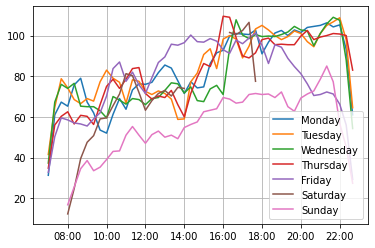

In [11]:
rsf_data = rsf_data[rsf_data["Date"].apply(within_opening_hours)].reindex()
days_of_week_data = [rsf_data[rsf_data["Date"].apply(datetime.weekday) == i] for i in range(7)]
for i in range(7):
    # group by 10-minute intervals and find the mean of "Weight Rooms" in each group
    days_of_week_data[i] = days_of_week_data[i].groupby(pd.Grouper(key="Date", freq="20min"))["Weight Rooms"].mean().reset_index()

pd.plotting.register_matplotlib_converters()
plt_1, ax = plt.subplots()
plt.legend(days_of_the_week)
ax.xaxis.set_major_formatter(myFmt)
for i in range(7):
    x = days_of_week_data[i]["Date"].apply(hour_minute_only)
    y = days_of_week_data[i]["Weight Rooms"].values
    ax.plot(x, y, label=days_of_the_week[i])
ax.legend(days_of_the_week)

plt.grid()

plt.show()
# Keep line for each day of the week, overlay on graph, find averages


